In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
data = pd.read_csv('./Data Directory/crypto-markets.csv',parse_dates=['date'], index_col='date')
print(data)

                    slug symbol          name  ranknow        open  \
date                                                                 
2013-04-28       bitcoin    BTC       Bitcoin        1  135.300000   
2013-04-29       bitcoin    BTC       Bitcoin        1  134.440000   
2013-04-30       bitcoin    BTC       Bitcoin        1  144.000000   
2013-05-01       bitcoin    BTC       Bitcoin        1  139.000000   
2013-05-02       bitcoin    BTC       Bitcoin        1  116.380000   
2013-05-03       bitcoin    BTC       Bitcoin        1  106.250000   
2013-05-04       bitcoin    BTC       Bitcoin        1   98.100000   
2013-05-05       bitcoin    BTC       Bitcoin        1  112.900000   
2013-05-06       bitcoin    BTC       Bitcoin        1  115.980000   
2013-05-07       bitcoin    BTC       Bitcoin        1  112.250000   
2013-05-08       bitcoin    BTC       Bitcoin        1  109.600000   
2013-05-09       bitcoin    BTC       Bitcoin        1  113.200000   
2013-05-10       bit

In [3]:
response = requests.get("http://localhost:5000/parse",params={"q":"Bitcoin highest value"})
response = response.json()
print (response)
entities = response.get("entities")
intent = response.get("intent")

{'entities': [{'start': 0, 'extractor': 'ner_crf', 'end': 7, 'value': 'bitcoin', 'entity': 'Crypto'}], 'intent': {'confidence': 0.6448202463879031, 'name': 'GetHighestValueByName'}, 'text': 'Bitcoin highest value', 'intent_ranking': [{'confidence': 0.6448202463879031, 'name': 'GetHighestValueByName'}, {'confidence': 0.11159862229298766, 'name': 'Prediction'}, {'confidence': 0.07509936410769327, 'name': 'GetCloseByDate'}, {'confidence': 0.031231629065120028, 'name': 'PlotCurrencyGraph'}, {'confidence': 0.026048815367143548, 'name': 'AttributesKnowledgeBase'}, {'confidence': 0.025986740397902504, 'name': 'GetStatusByName'}, {'confidence': 0.018708414215401703, 'name': 'CryptoList'}, {'confidence': 0.018116039181899756, 'name': 'greet'}, {'confidence': 0.01648417049078743, 'name': 'goodbye'}, {'confidence': 0.016386375722625534, 'name': 'intro'}]}


In [4]:
#Closing value for date
for i in entities:
    if i['entity'] =='Crypto':
        crypto=str(i['value'].title())
    if i['entity']=='date':
        temp=pd.to_datetime(i['value'],format='%d-%m-%Y')
        data1 = data.loc[data.index == temp]
x=data1.loc[data1['name']==crypto]
print("Response text: "+str(x['close'][0]))

NameError: name 'data1' is not defined

In [5]:
#highest value by name
response_text=''
data1 = data.groupby('name')['high'].max()
for i in entities:
    temp=str(i['value']).title()
    response_text = response_text + str(i['value'].title()) + " Highest value ever was $" + str(data1[temp]) + "\n"
print(response_text)

Bitcoin Highest value ever was $20089.0



In [6]:
#Attributes
response= data.columns.values.tolist()
print(str(response)[1:-1])

'slug', 'symbol', 'name', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread'


In [7]:
#Status
response_text =''
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    response_text = response_text + str(i['value'].title()) +' last known value to me for the date ' +str(data1.index[-1].date()) +' is : ' +str(data1['close'][-1]) +"\n"
print (response_text)

Bitcoin last known value to me for the date 2018-06-06 is : 7653.98



In [8]:
#crypto list
response_text = "The list of cryptos currently in my database include "
final_data = data.name.unique()
final_data = str(final_data)
response_text = response_text + final_data[1:-1]
print(response_text)

The list of cryptos currently in my database include 'Bitcoin' 'Ethereum' 'Ripple' ... 'ENTCash' 'Jingtum Tech' 'Aston'


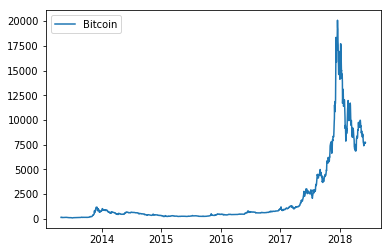

In [9]:
#plot graph
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    plt.plot(data1['high'],label=i['value'].title())
    plt.legend(loc='best')
plt.show()

In [29]:
#Prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import numpy as np

In [10]:
for i in entities:
    data1 = data.loc[data['name']==i['value'].title()]
print(data1)

               slug symbol     name  ranknow     open     high      low  \
date                                                                      
2013-04-28  bitcoin    BTC  Bitcoin        1   135.30   135.98   132.10   
2013-04-29  bitcoin    BTC  Bitcoin        1   134.44   147.49   134.00   
2013-04-30  bitcoin    BTC  Bitcoin        1   144.00   146.93   134.05   
2013-05-01  bitcoin    BTC  Bitcoin        1   139.00   139.89   107.72   
2013-05-02  bitcoin    BTC  Bitcoin        1   116.38   125.60    92.28   
2013-05-03  bitcoin    BTC  Bitcoin        1   106.25   108.13    79.10   
2013-05-04  bitcoin    BTC  Bitcoin        1    98.10   115.00    92.50   
2013-05-05  bitcoin    BTC  Bitcoin        1   112.90   118.80   107.14   
2013-05-06  bitcoin    BTC  Bitcoin        1   115.98   124.66   106.64   
2013-05-07  bitcoin    BTC  Bitcoin        1   112.25   113.44    97.70   
2013-05-08  bitcoin    BTC  Bitcoin        1   109.60   115.78   109.60   
2013-05-09  bitcoin    BT

In [20]:
train = data1.iloc[0:-100]
valid = data1.iloc[-100:]
print(train)
print(valid)

               slug symbol     name  ranknow      open      high       low  \
date                                                                         
2013-04-28  bitcoin    BTC  Bitcoin        1    135.30    135.98    132.10   
2013-04-29  bitcoin    BTC  Bitcoin        1    134.44    147.49    134.00   
2013-04-30  bitcoin    BTC  Bitcoin        1    144.00    146.93    134.05   
2013-05-01  bitcoin    BTC  Bitcoin        1    139.00    139.89    107.72   
2013-05-02  bitcoin    BTC  Bitcoin        1    116.38    125.60     92.28   
2013-05-03  bitcoin    BTC  Bitcoin        1    106.25    108.13     79.10   
2013-05-04  bitcoin    BTC  Bitcoin        1     98.10    115.00     92.50   
2013-05-05  bitcoin    BTC  Bitcoin        1    112.90    118.80    107.14   
2013-05-06  bitcoin    BTC  Bitcoin        1    115.98    124.66    106.64   
2013-05-07  bitcoin    BTC  Bitcoin        1    112.25    113.44     97.70   
2013-05-08  bitcoin    BTC  Bitcoin        1    109.60    115.78

In [31]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['open'], order=(2,1,4), seasonal_order=(0,1,1,7)).fit()#Seasonal_Order(AR parameters, difference,MA parameters,periodicity)
y_hat_avg['SARIMA']= fit1.predict(start=y_hat_avg.index[-1],end="2018-7-15", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train['open'], label='Train')
plt.plot(valid['open'], label='Valid')
plt.plot(y_hat_avg['Holt_Winters'], label='Holt_Winters')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


KeyError: 'Holt_Winters'

In [28]:
print (y_hat_avg)

               slug symbol     name  ranknow      open      high       low  \
date                                                                         
2018-02-27  bitcoin    BTC  Bitcoin        1  10393.90  10878.50  10246.10   
2018-02-28  bitcoin    BTC  Bitcoin        1  10687.20  11089.80  10393.10   
2018-03-01  bitcoin    BTC  Bitcoin        1  10385.00  11052.30  10352.70   
2018-03-02  bitcoin    BTC  Bitcoin        1  10977.40  11189.00  10850.10   
2018-03-03  bitcoin    BTC  Bitcoin        1  11101.90  11528.20  11002.40   
2018-03-04  bitcoin    BTC  Bitcoin        1  11497.40  11512.60  11136.10   
2018-03-05  bitcoin    BTC  Bitcoin        1  11532.40  11704.10  11443.90   
2018-03-06  bitcoin    BTC  Bitcoin        1  11500.10  11500.10  10694.30   
2018-03-07  bitcoin    BTC  Bitcoin        1  10803.90  10929.50   9692.12   
2018-03-08  bitcoin    BTC  Bitcoin        1   9951.44  10147.40   9335.87   
2018-03-09  bitcoin    BTC  Bitcoin        1   9414.69   9466.35